In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
#import ggplot as ggplot
from plotnine.data import economics

In [3]:
# Raw data file
file_to_load = "Resources/profiles_revised_Mar_29.csv"

# Read purchasing file and store into pandas data frame
df= pd.read_csv(file_to_load)
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn't matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn't want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
#df.dropna(inplace=True)

In [4]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.335402,68.295281,20033.222534
std,9.490009,3.994803,97346.192104
min,17.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,111.000000,95.000000,1000000.000000


In [5]:
total_nrows = df.shape[0] 
total_ncols = df.shape[1]
print('Total rows: ', total_nrows, ' Total columns: ', total_ncols)
print(df.info())

Total rows:  59946  Total columns:  19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  offspring    24385 non-null  object 
 11  orientation  59946 non-null  object 
 12  pets         40025 non-null  object 
 13  religion     39720 non-null  object 
 14  sex          59946 non-null  object 
 15  sign         48890 non-null  object 
 16  smokes       54434 non-null  object 
 17  speaks       59896 non-null  object 
 18  status 

In [6]:
df1 = df.dropna(subset=['diet', 'drugs','education','age','status','sex','orientation','body_type',
'ethnicity','job','pets'])

In [7]:
 def rmissingvaluecol(df1,threshold):
    l = []
    l = list(df1.drop(df1.loc[:,list((100*(df1.isnull().sum()/len(df1.index))>=threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values:"%threshold,(df1.shape[1] - len(l)))
    print("Columns:\n",list(set(list((df1.columns.values))) - set(l)))
    return l

In [8]:
l = rmissingvaluecol(df1,1)
df2 = df1[l]
df2.head()

# Columns having more than 1 percent missing values: 4
Columns:
 ['smokes', 'sign', 'religion', 'offspring']


C:\Users\sarma\AppData\Local\Temp/ipykernel_16764/174281756.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,orientation,pets,sex,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,straight,likes dogs and likes cats,m,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,straight,likes dogs and likes cats,m,"english (fluently), spanish (poorly), french (...",single
7,30,average,mostly anything,socially,never,graduated from college/university,white,65.0,-1,artistic / musical / writer,straight,likes dogs and likes cats,f,"english, spanish (okay)",single
9,37,athletic,mostly anything,not at all,never,working on two-year college,white,65.0,-1,student,straight,likes dogs and likes cats,m,english (fluently),single
11,27,average,mostly anything,socially,never,graduated from college/university,white,72.0,40000,banking / financial / real estate,straight,likes cats,m,"english (fluently), sign language (poorly)",seeing someone


<Figure size 1080x504 with 0 Axes>

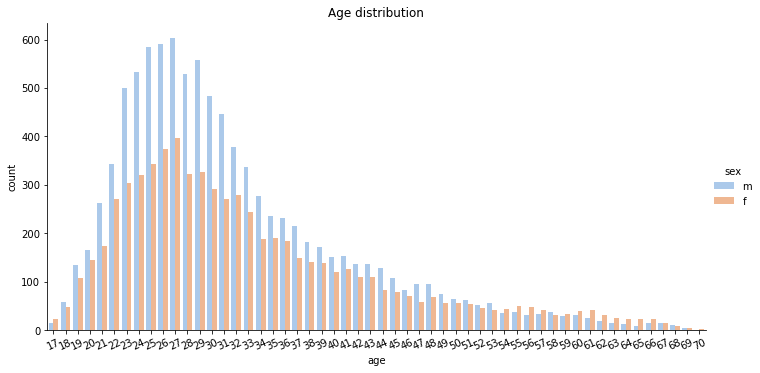

In [9]:
# sns.countplot(y = 'age', data = my_data)
plt.figure(figsize=(15, 7))
sns.catplot(x='age', data = df1, kind='count', palette='pastel', hue='sex', 
            height=5, # make the plot 5 units high
            aspect=2)
plt.xticks(rotation = 25)
plt.title('Age distribution')
plt.show()

In [10]:
#Orientation in percentage
def show_percetage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+p.get_width()/2-0.1
        y = p.get_y()+p.get_height()
        ax.annotate(percentage, (x, y), size=10)

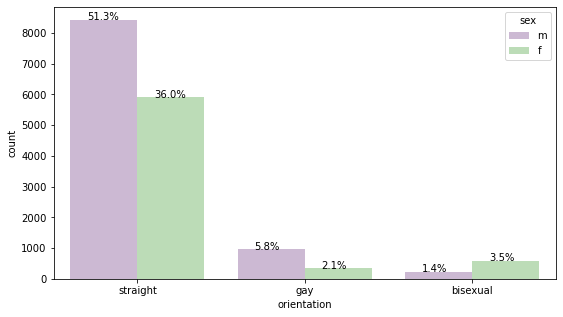

In [11]:
# Orientation (in percentage) of male and females. Represent using a suitable graph
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='orientation', data=df1,
hue='sex',
palette='PRGn',
order=df1['orientation'].value_counts().iloc[:10].index)
total = float(len(df1))
show_percetage(ax, df1)
plt.show()

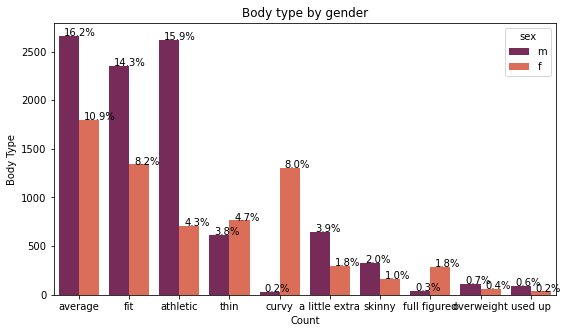

In [12]:
#Body type plot
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='body_type', data=df1,
hue='sex',
palette='rocket',
order=df1['body_type'].value_counts().iloc[:10].index)
ax.set_title("Body type by gender")
ax.set(xlabel='Count', ylabel='Body Type')
show_percetage(ax, df1)
plt.show()

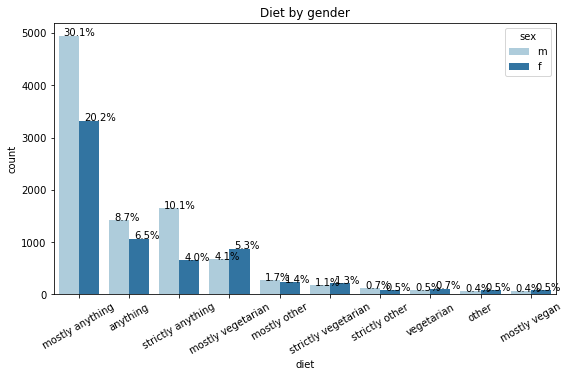

In [13]:
#Different diets by gender. Represent using suitable graph
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='diet', data=df1,
hue='sex', palette='Paired',
order = df1['diet'].value_counts().iloc[:10].index)
plt.xticks(rotation = 30)
ax.set_title("Diet by gender")
show_percetage(ax, df1)

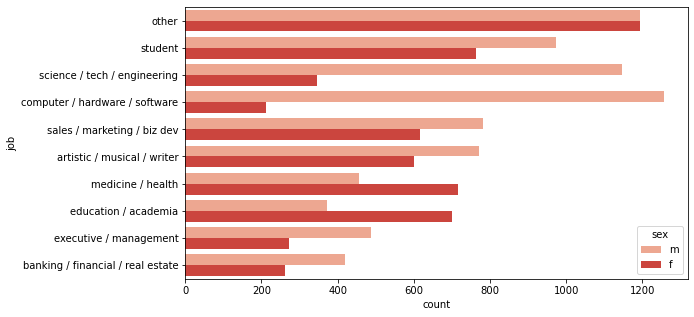

In [14]:
# Compare jobs of males and females. Represent using suitable graphs
plt.figure(figsize=(9, 5))
sns.countplot(y='job', data=df1,
hue='sex', palette='Reds',
order = df1['job'].value_counts().iloc[:10].index)
plt.show()


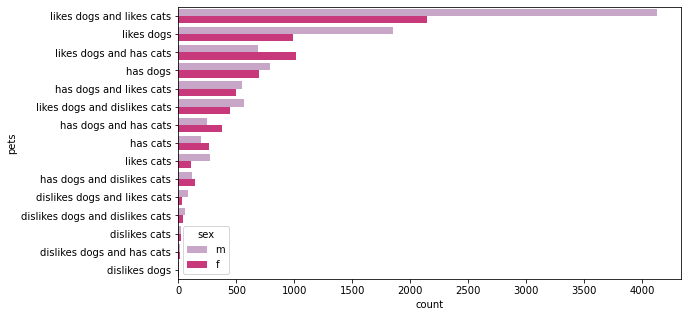

In [15]:
#Compare pets of different gender. Represent using suitable graphs
plt.figure(figsize=(9, 5))
sns.countplot(y = 'pets', data=df1,
hue='sex', palette='PuRd',
order=df1['pets'].value_counts().iloc[:].index)
plt.show()

In [16]:
list(df.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'height',
 'income',
 'job',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [17]:
print("nnumber of catogries : ",df.sign.nunique())

nnumber of catogries :  48


In [18]:
print("Catogries : ",df.sign.unique())

Catogries :  ['gemini' 'cancer' "pisces but it doesn't matter" 'pisces' 'aquarius'
 'taurus' 'virgo' 'sagittarius' "gemini but it doesn't matter"
 "cancer but it doesn't matter" "leo but it doesn't matter" nan
 "aquarius but it doesn't matter" "aries and it's fun to think about"
 "libra but it doesn't matter" "pisces and it's fun to think about"
 'libra' "taurus but it doesn't matter"
 "sagittarius but it doesn't matter" 'scorpio and it matters a lot'
 "gemini and it's fun to think about" "leo and it's fun to think about"
 "cancer and it's fun to think about" "libra and it's fun to think about"
 "aquarius and it's fun to think about" "virgo but it doesn't matter"
 "scorpio and it's fun to think about" "capricorn but it doesn't matter"
 'scorpio' "capricorn and it's fun to think about" 'leo'
 "aries but it doesn't matter" 'aries' "scorpio but it doesn't matter"
 "sagittarius and it's fun to think about" 'libra and it matters a lot'
 "taurus and it's fun to think about" 'leo and it matte

In [19]:
df.sign

0                                    gemini
1                                    cancer
2              pisces but it doesn't matter
3                                    pisces
4                                  aquarius
                        ...                
59941    cancer and it's fun to think about
59942             leo but it doesn't matter
59943     sagittarius but it doesn't matter
59944       leo and it's fun to think about
59945    gemini and it's fun to think about
Name: sign, Length: 59946, dtype: object

In [20]:
df.sign.str.split()

0                                          [gemini]
1                                          [cancer]
2                [pisces, but, it, doesn't, matter]
3                                          [pisces]
4                                        [aquarius]
                            ...                    
59941    [cancer, and, it's, fun, to, think, about]
59942               [leo, but, it, doesn't, matter]
59943       [sagittarius, but, it, doesn't, matter]
59944       [leo, and, it's, fun, to, think, about]
59945    [gemini, and, it's, fun, to, think, about]
Name: sign, Length: 59946, dtype: object

In [21]:
df['signcleaned'] = df.sign.str.split().str.get(0)

In [22]:
df['signcleaned'].tail()

59941         cancer
59942            leo
59943    sagittarius
59944            leo
59945         gemini
Name: signcleaned, dtype: object

In [23]:
print("catogries : ",  list(df.signcleaned.unique()))

catogries :  ['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo', 'sagittarius', 'leo', nan, 'aries', 'libra', 'scorpio', 'capricorn']


In [24]:
df.signcleaned.value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signcleaned, dtype: int64

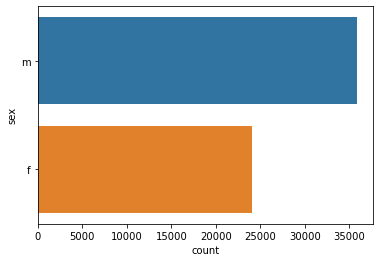

In [25]:
#Males and females in Data
sns.countplot(data=df, y="sex");

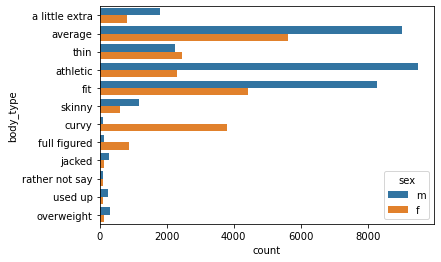

In [26]:
#body type by Gender
sns.countplot(data=df, y="body_type", hue = "sex");

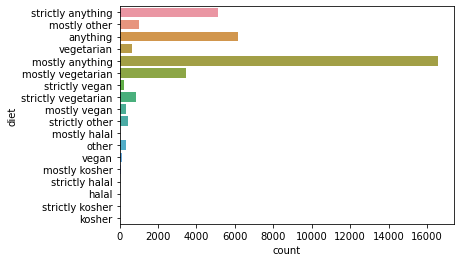

In [27]:
#chart of the dietary information for users
sns.countplot(data=df, y="diet");

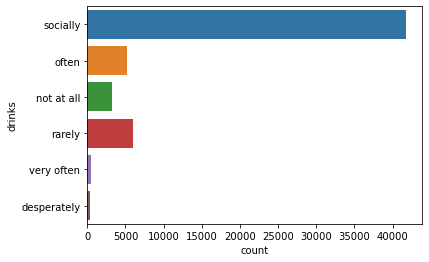

In [28]:
#plot shows that the majority of the users drink "socially", then "rarely" and "often"
sns.countplot(data=df, y="drinks");

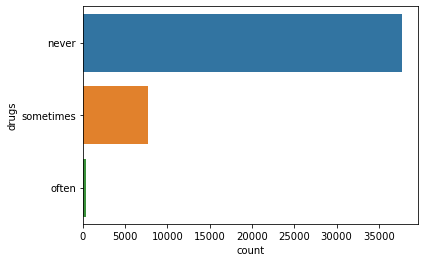

In [29]:
#Drugs users
sns.countplot(data=df, y="drugs");

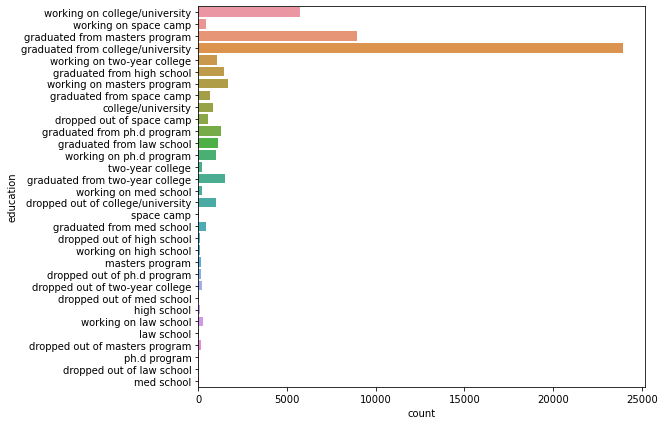

In [30]:
#Education level
plt.figure(figsize=(8,7))

sns.countplot(data=df, y="education");

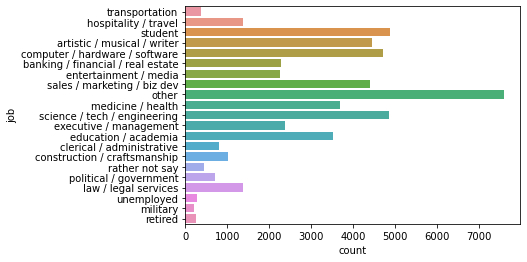

In [31]:
#Jobs(Most users don't fit into the categories provided)
sns.countplot(data=df, y="job");

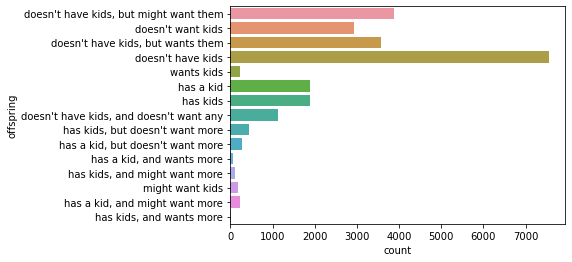

In [32]:
#users with kids
sns.countplot(data=df, y="offspring");

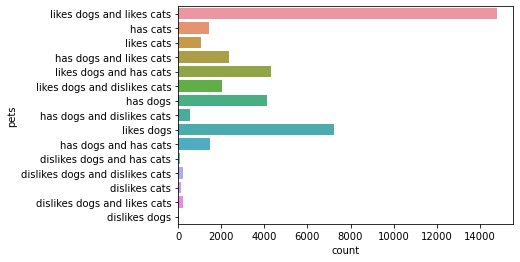

In [33]:
#Pets
sns.countplot(data=df, y="pets");

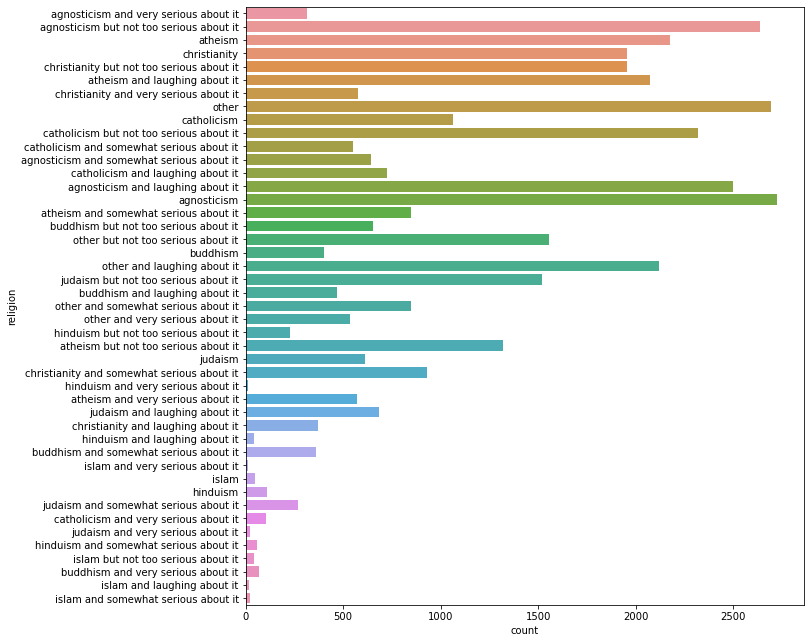

In [34]:
#Religion(Religion was similar to sign where there are a lot of qualifiers)
plt.figure(figsize=(10,11))
sns.countplot(data=df, y="religion");

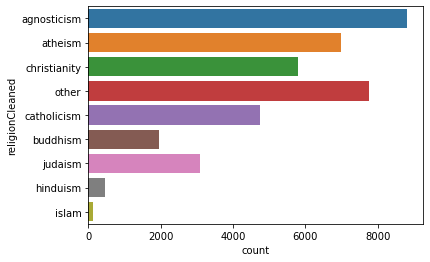

In [35]:
#religion was cleaned to take the first word and distilled down to 9 groups
df['religionCleaned'] = df.religion.str.split().str.get(0)
sns.countplot(data=df, y="religionCleaned");

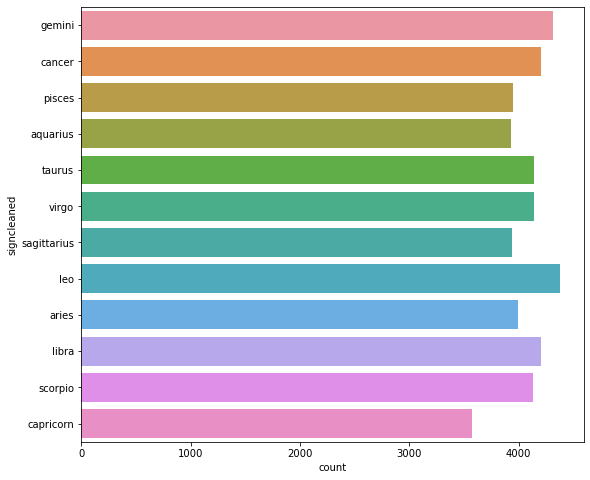

In [36]:
#Signs
plt.figure(figsize=(9,8))
sns.countplot(data=df, y="signcleaned");

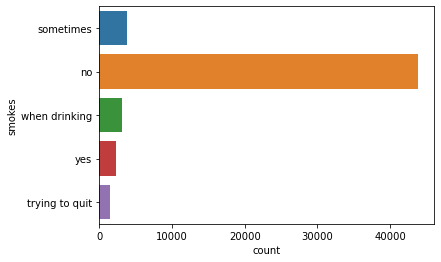

In [37]:
#Smoking
sns.countplot(data=df, y="smokes");

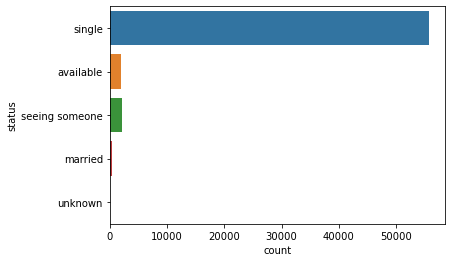

In [38]:
#Status
sns.countplot(data=df, y="status");